In [1]:
#from software.Scripts.Statistics import pyStats
import pyStats
from ROOT import TMath;
#import ROOT
#path="/software/Scripts/Statistics/"
#ROOT.gROOT.SetMacroPath(path)

Welcome to JupyROOT 6.30/04


In [2]:
countexp = pyStats.countingExperiment();
countexp.addChannel('myChannel', bkg = 6.86571261029315, bkgUnc = 2.222980093459385, Nobs = 14);
print(countexp);
print("Significance",countexp.getSignificance());

---------------------------
Counting experiment "myCountingExperiment"
---------------------------
Int. luminosity = 1.0 +/- 0.0
---------------------------
Channel "myChannel":
   Background = 6.86571261029315 +/- 2.222980093459385
   Observed events = 14
   Signal efficiency = 1.0 +/- 0.0

Significance 1.6843585799464962


In [3]:
import limitPlot;

limitPlots = {'combined': limitPlot.limitPlot('Combined')};

#peek in the input file to check which channels are there
inputFile = open('inputsHiggs.txt','r');
lines = inputFile.readlines();
for l in lines:

    exec(l); #Input file consists of valid Python statements such as mass=300 etc.

    if 'channel=' in l:
        if not channel in limitPlots.keys():
            limitPlots[channel] = limitPlot.limitPlot(channel);

print( 'Will make the following limit plots:' );
print(limitPlots);
            
countexp = {};
xtitle='Mass';
ytitle='Cross section';
yrange=[-999.0,-999.0];

#read the inputs and fill in the respective limit plots with background levels, observed counts, etc. 
f = open('inputsHiggs.txt');
for l in f.readlines():

    exec(l); #Input file consists of valid Python statements such as mass=300 etc. 

    if 'mass=' in l: #Such a line defines a new point in the limit plot
        for channel in limitPlots.keys():
            countexp[channel] = pyStats.countingExperiment(name = 'mass = '+str(mass), intLum = intLum, intLumUnc = intLumUncertainty);
            limitPlots[channel].addPoint(mass, countexp[channel], theoryCrossSection);

    if 'channel=' in l: #Such a line gives the inputs for a given channel     
        countexp['combined'].addChannel(name = channel, bkg = background, bkgUnc = backgroundUncertainty, Nobs = Nobs, eff = efficiency, effUnc = efficiencyUncertainty);
        countexp[channel].addChannel(name = channel, bkg = background, bkgUnc = backgroundUncertainty, Nobs = Nobs, eff = efficiency, effUnc = efficiencyUncertainty);

Will make the following limit plots:
{'combined': Limit plot "Combined", '4E': Limit plot "4E", '4M': Limit plot "4M", 'EEMM': Limit plot "EEMM"}


In [4]:
print(limitPlots.keys())

dict_keys(['combined', '4E', '4M', 'EEMM'])


In [5]:
print(limitPlots['combined']);

Limit plot "Combined"

The plot consists of the following points:

x-axis value: 125
theory prediction: 74.276
---------------------------
Counting experiment "mass = 125"
---------------------------
Int. luminosity = 29049.3 +/- 639.0845999999999
---------------------------
Channel "4E":
   Background = 22.27604651170145 +/- 3.532474719858844
   Observed events = 18
   Signal efficiency = 0.03597546810172375 +/- 9.121782819697899e-05
Channel "4M":
   Background = 17.443037533500448 +/- 0.710918862664258
   Observed events = 34
   Signal efficiency = 0.07468642915191577 +/- 0.00013199936443515907
Channel "EEMM":
   Background = 21.726491701588753 +/- 1.1139605713337377
   Observed events = 49
   Signal efficiency = 0.10354357442950801 +/- 0.00015994832002381144



In [6]:
#limitPlots['combined'].calculate();
limitPlots['4M'].calculate();

INFO: Adjusting step length and retrying limit calculation


In [7]:
#print(limitPlots['combined']);
print(limitPlots['4M']);

Limit plot "4M"

The plot consists of the following points:

x-axis value: 125
theory prediction: 74.276
---------------------------
Counting experiment "mass = 125"
---------------------------
Int. luminosity = 29049.3 +/- 639.0845999999999
---------------------------
Channel "4M":
   Background = 17.443037533500448 +/- 0.710918862664258
   Observed events = 34
   Signal efficiency = 0.07468642915191577 +/- 0.00013199936443515907
---------------------------
Limit setting results:
Observed limit: 0.012912363175265984
Expected limit and bands:
  -2sigma                 -1sigma                 median                +1sigma                +2sigma
0.002634122087754228    0.00330556497286805    0.004545151837693568    0.006688604124787692    0.009219427307139838    



In [8]:
print(0.000124*0.059)

7.316e-06


Info in <TCanvas::Print>: png file limitplot.png has been created


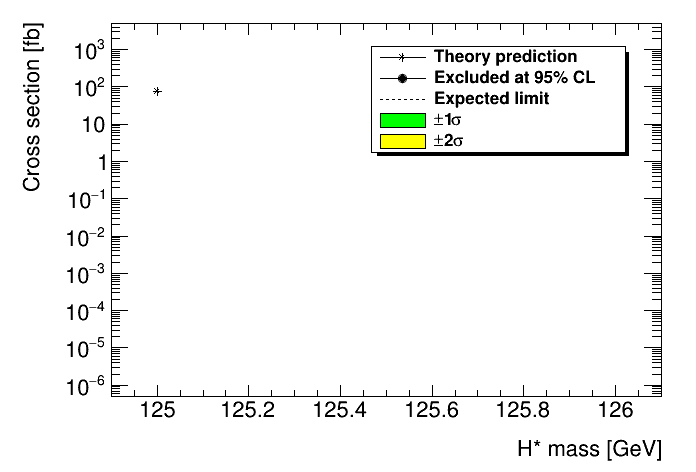

In [9]:
#%jsroot on
limitPlots['combined'].drawPlot(xtitle="H* mass [GeV]", ytitle="Cross section [fb]", yrange=[5.0e-7,5.0e3]);
#limitPlots['combined'].drawPlot(xtitle="G* mass [GeV]", ytitle="Cross section [fb]", yrange=[1,11]);

In [10]:
f = open('inputsHiggs.txt');
inpdic={}
firstline={}
for l in f.readlines():
    exec(l); #Input file consists of valid Python statements such as mass=300 etc.
    if "NmassPoints=" in l:
        firstline["NmassPoints"]=NmassPoints
        firstline["Nchannels"]=Nchannels
        firstline["intLum"]=intLum
        firstline["intLumUncertainty"]=intLumUncertainty
    if "mass=" in l:
        inpdic[mass]={}
    if "channel=" in l:
        inpdic[mass][channel]={}
        inpdic[mass][channel]["efficiency"]=efficiency
        inpdic[mass][channel]["efficiencyUncertainty"]=efficiencyUncertainty
        inpdic[mass][channel]["background"]=background
        inpdic[mass][channel]["backgroundUncertainty"]=backgroundUncertainty
        inpdic[mass][channel]["Nobs"]=Nobs
        

In [22]:
mass=125
countexp = pyStats.countingExperiment(str(mass), intLum=firstline["intLum"], intLumUnc=firstline["intLumUncertainty"]);
for channel in inpdic[mass].keys():
    countexp.addChannel(channel, bkg = inpdic[mass][channel]["background"], bkgUnc= inpdic[mass][channel]["backgroundUncertainty"], Nobs = inpdic[mass][channel]["Nobs"], eff=inpdic[mass][channel]["efficiency"], effUnc=inpdic[mass][channel]["efficiencyUncertainty"]);
print(countexp);
print( "Significance = ",countexp.getSignificance() );
print("p-value = ", norm.sf(countexp.getSignificance()));

---------------------------
Counting experiment "125"
---------------------------
Int. luminosity = 29049.3 +/- 639.0845999999999
---------------------------
Channel "4E":
   Background = 22.27604651170145 +/- 3.532474719858844
   Observed events = 18
   Signal efficiency = 0.03597546810172375 +/- 9.121782819697899e-05
Channel "4M":
   Background = 17.443037533500448 +/- 0.710918862664258
   Observed events = 34
   Signal efficiency = 0.07468642915191577 +/- 0.00013199936443515907
Channel "EEMM":
   Background = 21.726491701588753 +/- 1.1139605713337377
   Observed events = 49
   Signal efficiency = 0.10354357442950801 +/- 0.00015994832002381144

Significance =  5.497553925599667
p-value =  1.9254778575904e-08


In [20]:
from scipy.stats import norm
mass=125
countexp = pyStats.countingExperiment(str(mass), intLum=firstline["intLum"], intLumUnc=firstline["intLumUncertainty"]);
#for channel in inpdic[mass].keys():
channel="combined"
countexp.addChannel(channel, bkg = inpdic[mass][channel]["background"], bkgUnc= inpdic[mass][channel]["backgroundUncertainty"], Nobs = inpdic[mass][channel]["Nobs"], eff=inpdic[mass][channel]["efficiency"], effUnc=inpdic[mass][channel]["efficiencyUncertainty"]);
print(countexp);
sig=countexp.getSignificance()
print( "Significance = ",countexp.getSignificance() );
tail=norm.sf(sig)
print("p-value", tail)
#print( "p-value = ", TMath.Abs(TMath.NormQuantile(pValue)) ); #convert p-value to significance


KeyError: 'combined'

In [21]:
import numpy as np
mass=125
combibackg=0
combidat=0
for channel in inpdic[mass].keys():
    print(channel)
    backg=inpdic[mass][channel]["background"]
    combibackg+=backg
    dat=inpdic[mass][channel]["Nobs"]
    combidat+=dat
    
    print("Background =  ", backg)
    print("Data = ", dat)
    pValue=0
    #i=np.linspace(dat,dat+80,1000)

    for n in range(dat,dat+100):
        pValue += TMath.Poisson(n,backg)
    print("pValue = ", pValue)
    print( "Significance = ", TMath.Abs(TMath.NormQuantile(pValue)) ); #convert p-value to significance

pValue=0
#i=np.linspace(dat,dat+80,1000)
print("combined")
for n in range(combidat,combidat+100):
    pValue += TMath.Poisson(n,combibackg)
print("pValue = ", pValue)
print( "Significance = ", TMath.Abs(TMath.NormQuantile(pValue)) ); #convert p-value to significance


4E
Background =   22.27604651170145
Data =  18
pValue =  0.8448996566241816
Significance =  1.0148010214449072
4M
Background =   17.443037533500448
Data =  34
pValue =  0.0002876758656822277
Significance =  3.4429753603072575
EEMM
Background =   21.726491701588753
Data =  49
pValue =  3.4327028696381206e-07
Significance =  4.9651328503512975
combined
pValue =  2.341839593416504e-06
Significance =  4.578479561417604
